### import data

In [1090]:
# import needed packages
import pandas as pd
import urllib.request
import numpy as np
import matplotlib.pyplot as plt

# print latex non-italic
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)


# download fonts https://www.fontsquirrel.com/fonts/open-sans
# font = {
#         'sans-serif' : 'Open Sans', 
#         'family' : 'sans-serif',
#         'weight' : 'normal',
#         'size'   : 12}
# plt.rc('font', **font)


# # load data from github
# data_url = 'https://raw.githubusercontent.com/ebauch/NV_data/master/T2star_survey.csv'
# data = urllib.request.urlopen(data_url)
# pd.read_csv(data, encoding='latin1', header=0)
# df

# if data is saved locally as csv uncomment lines below
file = 'T2star_survey.csv'
df = pd.read_csv(file, encoding='latin1', header=0)
df

,Defect,Host,Concentration (cm^-3),Interrogated Vol. (um^3),Interrogated Spins,Bath Concentration (cm^-3),T2* (us),T2 (us),FOM1 (us),FOM2 (us),Bath,Reference,Cryogenic,Measurement,Comment,Where to Find
0,NV-,Diamond,2.5E+12,10000.0,2.5E+04,8.800000e+15,68,650,1.70E+14,1.70E+06,"0.05 ppm N, 0.01% 13C",Bauch2017,no,optical,"Thor, double quantum",table supplement
1,NV-,Diamond,1E+15,10000.0,1.0E+07,1.300000e+17,58,250,5.80E+16,5.80E+08,"0.75 ppm N, 0.01% 13C",Bauch2017,no,optical,"Leo, double quantum + spin bath driving",table supplement
2,NV-,Diamond,1E+16,4000.0,1.0E+07,1.800000e+18,5,14,5.00E+16,5.00E+07,"10 ppm N, 0.05% 13C",Bauch2017,no,optical,"Jamie, double quantum + spin bath driving",table supplement
3,NV-,Diamond,2.992E+17,10000.0,3.0E+09,4.800000e+18,0.5,NaN,1.50E+17,n/a,"1.7 ppm NV, 27 ppm N, 0.01% 13C",Barry2016,no,optical,NaN,NaN
4,NV-,Diamond,7.0E+16,NaN,1.0E+10,1.100000e+17,2.4,NaN,1.72E+17,2.45E+10,"0.4 ppm NV, 0.6 ppm N, 0.03% 13C",Grezes2015,no,optical,NaN,"4th paragraph, page 3 last paragraph"
5,NV-,Diamond,5.00E+10,NaN,1.0E+00,7.000000e+15,18.5,NaN,9.25E+11,1.85E+01,0.01% 13C,Ishikawa2012\n(single NV),no,optical,NaN,"2nd page 1st pargraph, fig. 3d, suppl."
6,NV-,Diamond,n/a,NaN,1.0E+11,NaN,0.2,NaN,n/a,2.00E+10,n/a,Kubo2011,no,optical,NaN,"last page, bottom left"
7,NV-,Diamond,7E+17,NaN,5.3E+11,1.800000e+19,0.15,NaN,1.05E+17,7.88E+10,"< 100 ppm N, 1.1 13C%",Acosta2010,no,optical,NaN,3rd paragraph
8,NV-,Diamond,2.8E+18,NaN,2.2E+08,1.800000e+19,0.1,NaN,2.80E+17,2.18E+07,"< 100 ppm N, 1.1 13C%",Acosta2009,no,optical,NaN,abstract
9,NV-,Diamond,7.92E+18,NaN,1.0E+05,3.520000e+18,0.055,NaN,4.36E+17,5.50E+03,"20 ppm N, 45 ppm NV, 1.1% 13C",Kucsko2017,no,optical,NaN,"supplement 1.1, 2"


0                     Bauch2017
1                     Bauch2017
2                     Bauch2017
3                     Barry2016
4                    Grezes2015
5     Ishikawa2012\n(single NV)
6                      Kubo2011
7                    Acosta2010
8                    Acosta2009
9                    Kucsko2017
10                    Bauch2017
11                    Bauch2017
12                     Rose2017
13                      Abe2010
14                     Zhou2017
15                   Klimov2015
16                    Koehl2011
17                    Koehl2017
18                    Koehl2017
19                   George2013
20                          NaN
21                          NaN
22                  Angerer2016
23                   Maurer2012
24                          NaN
25                 Christle2014
Name: Reference, dtype: object

In [1063]:
## datadefintions

# spin density
x1 = pd.to_numeric(df.iloc[:,2], 'coerce').get_values()
# number of interrogated spins
x2 = pd.to_numeric(df.iloc[:,4], 'coerce').get_values()
# T2* in us
x3 = pd.to_numeric(df.iloc[:,5], 'coerce').get_values()
# interrogation vol
x4 = pd.to_numeric(df.iloc[:,3], 'coerce').get_values()

# T2* in us
y1 = pd.to_numeric(df.iloc[:,6], 'coerce').get_values()
# FOM1 = T2* x spin density
y2 = pd.to_numeric(df.iloc[:,8], 'coerce').get_values()
# FOM2 = T2* x interrogated spins
y3 = pd.to_numeric(df.iloc[:,9], 'coerce').get_values()
# T2 in us
y4 = pd.to_numeric(df.iloc[:,7], 'coerce').get_values()

# reference + remove spaces
labels = df['Reference'].get_values()
# labels = [label.replace(" ","") for label in labels]

# NV Comparison Plots

### T2* versus NV density

In [1068]:
# t = matplotlib.textpath.TextPath((0,0), 'hello', size=9, prop='WingDings')
# bb = t.get_extents()

# #bb:
# #Bbox(array([[  0.759375 ,   0.8915625],
# #            [ 30.4425   ,   5.6109375]]))

# w = bb.width

In [1066]:
labels

array(['Bauch2017', 'Bauch2017', 'Bauch2017', 'Barry2016', 'Grezes2015',
       'Ishikawa2012\n(single NV)', 'Kubo2011', 'Acosta2010', 'Acosta2009',
       'Kucsko2017', 'Bauch2017', 'Bauch2017', 'Rose2017', 'Abe2010',
       'Zhou2017', 'Klimov2015', 'Koehl2011', 'Koehl2017', 'Koehl2017',
       'George2013', nan, nan, 'Angerer2016', 'Maurer2012', nan,
       'Christle2014'], dtype=object)

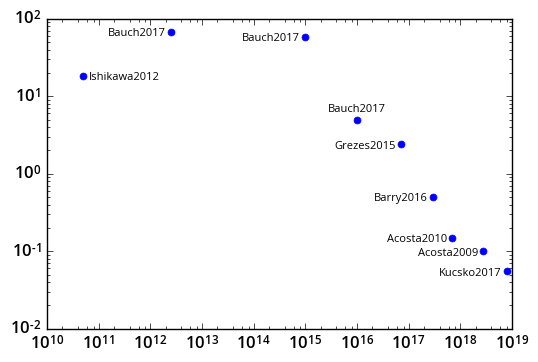

In [1067]:
# this will palce labels based on positonmask (left, right from data point)
# position mask is optional argument
def place_labels(xypos, labels, *positionmask):
    length = len(xypos[0])
    # define default position mask - all labels left
    if not positionmask:
        positionmask = ['l'] * length
    elif len(positionmask[0]) < length:
        positionmask = positionmask[0] + ['l'] * (length - len(positionmask))
#       print(positionmask)
    else: 
        if len(positionmask[0]) > length:

            positionmask = positionmask[0][:length]
    
    for i in range(length):
                
        if positionmask[i] == 'l':
            position_offsetx = 0.8
            position_offsety = 0.95
            alignment = 'right'
        elif positionmask[i] == 'r':
            position_offsetx = 1.3
            position_offsety = 0.95           
            alignment = 'left'
        elif positionmask[i] == 't':
            position_offsetx = 1
            position_offsety = 1.35           
            alignment = 'center'
        elif positionmask[i] == 't':
            position_offsetx = 1
            position_offsety = 1.35           
            alignment = 'center'
        plt.text(xypos[0][i]*position_offsetx, xypos[1][i] * position_offsety, labels[i], fontsize=8, fontweight='normal', va='center', ha=alignment)
        
plt.plot(x1n, y1n, 'b.', ms=10)
# place_labels(labels)

place_labels([x1n, y1n], labelsn, ['l','l','t','l','l','r','l','l','l','l','l','r'])

# for i in range(length):
#     plt.text(x1n[i]*0.8, y1n[i]*(0.99), labelsn[i], fontsize=8, fontweight='normal', va='center', ha='right')

plt.xscale('log')
plt.yscale('log')

C:\Users\user\Anaconda3\envs\py34\lib\site-packages\ipykernel\__main__.py:6: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 19 but corresponding boolean dimension is 10
C:\Users\user\Anaconda3\envs\py34\lib\site-packages\ipykernel\__main__.py:7: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 19 but corresponding boolean dimension is 10
C:\Users\user\Anaconda3\envs\py34\lib\site-packages\ipykernel\__main__.py:9: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 19 but corresponding boolean dimension is 10


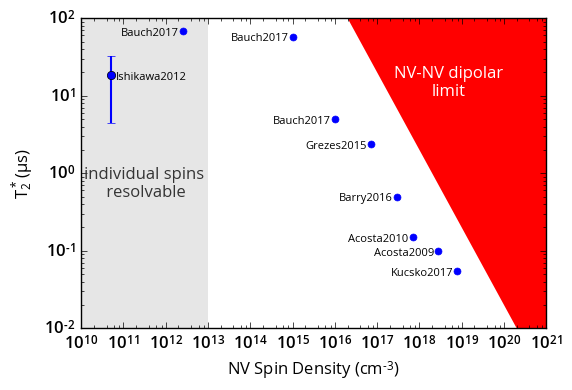

In [995]:
# pick non-nan values
ind = (~np.isnan(y1)) * (~np.isnan(x1)) 
# select only NV center values - first ten 
ind = ind[:10]

x1n = x1[ind]
y1n = y1[ind]
length = len(x1n)
labelsn = np.array(labels)[ind]

# plot data + labels
plt.plot(x1n, y1n, 'b.', ms=10)
place_labels([x1n, y1n], labelsn, ['l','l','l','l','l','r'])

# plot iskawa 
plt.errorbar(5e10, 18.5, yerr=[14], fmt='o', color='b', lw=1.5)
# plt.text(5e10, 1.05, 18.5)
# set plot labels

## plot shaded areas + text labels

# single spin sensitivity
# plt.plot([1e13,1e13], [1e-3,1e3],'k--', lw=1.5)
plt.fill_between([0, 10**13], [10**-3,10**-3], [10**3,10**3], facecolor='.90', edgecolor='None', interpolate=False)
plt.text(3*10**11, 5*10**-1, 'individual spins\n resolvable', ha='center', color='0.20', fontweight='normal')

# plot p1-limit
xx = np.linspace(1e15, 1e23, 100);
l1 = 1/(2 * np.pi * 0.014 * xx/(1.76*1e17))
# plt.plot(xx, l1, 'k--')
plt.fill_between(xx, l1, [10**6] * len(l1), where = [10**6] > l1, facecolor='r', edgecolor='None', interpolate=False)
plt.text(5 * 10**18, 10**1, 'NV-NV dipolar\nlimit', ha='center', color='#ffffff', fontweight='normal')

## plot settings
plt.xlabel('NV Spin Density ($cm^{-3}$)')
plt.ylabel(r'$T_2^* (\mu$s)')

plt.xscale('log')
plt.yscale('log')

# plt.xlim(10**10, 10**19)
ax = plt.gca()
ax.set_xlim([1e10,1e21])
plt.ylim([10**-2, 100])

plt.savefig("T2star_survey_fig1.pdf")
plt.savefig("T2star_survey_fig1.png")

plt.show()

### Compare T2* and FOM2 versus Interrogated Spin

### FOM $\equiv T_2* \times$ NV spin density vs. NV spin density
#nvfom1

In [982]:
labelsn

array(['Bauch2017', 'Bauch2017', 'Bauch2017', 'Barry2016', 'Grezes2015',
       'Ishikawa2012', 'Acosta2010', 'Acosta2009', 'Kucsko2017'], 
      dtype='<U12')

C:\Users\user\Anaconda3\envs\py34\lib\site-packages\ipykernel\__main__.py:6: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 19 but corresponding boolean dimension is 10
C:\Users\user\Anaconda3\envs\py34\lib\site-packages\ipykernel\__main__.py:7: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 19 but corresponding boolean dimension is 10
C:\Users\user\Anaconda3\envs\py34\lib\site-packages\ipykernel\__main__.py:10: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 19 but corresponding boolean dimension is 10


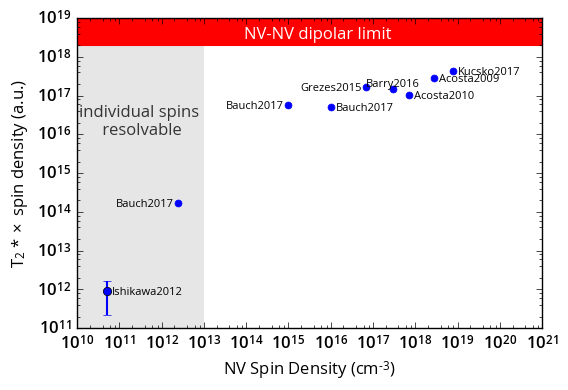

In [998]:
# pick non-nan values
ind = (~np.isnan(y2)) * (~np.isnan(x1)) 
# select only NV center values - first ten 
ind = ind[:10]

x1n = x1[ind]
y2n = y2[ind]

length = len(x1n)
labelsn = np.array(labels)[ind]

# plot data + labels
plt.plot(x1n, y2n, 'b.', ms=10)
place_labels([x1n, y2n], labelsn, ['l','l','r','t','l','r','r','r','r','r'])

# plot p1-limit
xx = np.linspace(1e9, 1e22, 200);
plt.plot(xx, xx * 1/(2 * np.pi * 0.014 * xx/(1.76*1e17)), 'r-', lw=1.5)

# plot Ishikawa
plt.errorbar(5e10, 5.00e10 * 18.5, yerr=14 * 5.00e10, fmt='o', color='b', lw=1.5)
# plt.text(5e10, 1.05, 18.5)
# set plot labels

## plot shaded areas + text labels

# single spin sensitivity
# plt.plot([1e13,1e13], [1e-3,1e3],'k--', lw=1.5)
plt.fill_between([0, 1e13], [1e10,1e10], [1e20,1e20], facecolor='.90', edgecolor='None', interpolate=False)
plt.text(3e11, 1e16, 'individual spins\n resolvable', ha='center', color='0.20', fontweight='normal')

# plot dipolar limit
xx = np.linspace(1e15, 1e23, 100);
l1 = 1/(2 * np.pi * 0.014/(1.76*1e17))
# plt.plot(xx, l1, 'k--')
plt.fill_between([1e10, 1e21], [l1, l1], [1e20, 1e20], facecolor='r', edgecolor='None', interpolate=False)
plt.text(5 * 1e15, 3 * 1e18, 'NV-NV dipolar limit', ha='center', color='#ffffff', fontweight='normal')

## plot settings

plt.xlabel('NV Spin Density ($cm^{-3}$)')
plt.ylabel(r'$T_2* \times $ spin density (a.u.)')

plt.xscale('log')
plt.yscale('log')

plt.xlim(1e10, 1e21)
plt.ylim([1e11, 1e19])

plt.savefig("T2star_survey_fig1_fom.pdf")
plt.savefig("T2star_survey_fig1_fom.png")

plt.show()

### Compare T2* and FOM2 versus Interrogated Spin

### T2* versus N density
#t2vsn

C:\Users\user\Anaconda3\envs\py34\lib\site-packages\ipykernel\__main__.py:6: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 19 but corresponding boolean dimension is 10
C:\Users\user\Anaconda3\envs\py34\lib\site-packages\ipykernel\__main__.py:7: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 19 but corresponding boolean dimension is 10
C:\Users\user\Anaconda3\envs\py34\lib\site-packages\ipykernel\__main__.py:9: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 19 but corresponding boolean dimension is 10


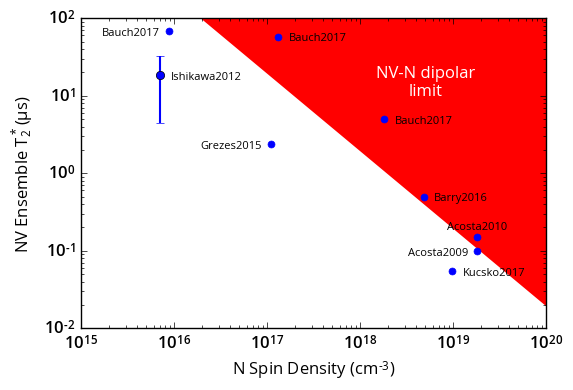

In [1033]:
# pick non-nan values
ind = (~np.isnan(y1)) * (~np.isnan(x3)) 
# select only NV center values - first ten 
ind = ind[:10]

x3n = x3[ind]
y1n = y1[ind]
length = len(x3n)
labelsn = np.array(labels)[ind]

# plot p1-limit
xx = np.linspace(1e11, 1e22, 200);
plt.plot(xx, 1/(2 * np.pi * 0.014 * xx/(1.76*1e17)), 'r-', lw=1.5)

# plot data + labels
plt.plot(x3n, y1n, 'b.', ms=10)
place_labels([x3n, y1n], labelsn, ['l','r','r','r','l','r','t','l','r','r'])

# set single spin resolvability limit
# plt.plot([1e13,1e13], [1e-3,1e3],'k--', lw=1.5)

# plot Ishikawa
plt.errorbar(7e15, 18.5, yerr=[14], fmt='o', color='b', lw=1.5)

## set shaded region

# plot p1-limit
xx = np.linspace(1e15, 1e23, 100);
l1 = 1/(2 * np.pi * 0.014 * xx/(1.76*1e17))
plt.fill_between(xx, l1, [10**6] * len(l1), where = [10**6] > l1, facecolor='r', edgecolor='None', interpolate=False)
plt.text(5 * 10**18, 10**1, 'NV-N dipolar\nlimit', ha='center', color='#ffffff', fontweight='normal')

## plot settings
plt.xlabel('N Spin Density ($cm^{-3}$)')
plt.ylabel(r'NV Ensemble $T_2^* (\mu$s)')

plt.xscale('log')
plt.yscale('log')

# plt.xlim(10**15, 10**20)
ax = plt.gca()
ax.set_xlim([1e15,1e20])

plt.ylim([10**-2, 100])

plt.savefig("T2star_survey_fig2.pdf")
plt.savefig("T2star_survey_fig2.png")

plt.show()

### FOM $\equiv T_2* \times$ NV spin density vs. N spin density
#nvfom2

C:\Users\user\Anaconda3\envs\py34\lib\site-packages\ipykernel\__main__.py:6: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 19 but corresponding boolean dimension is 10
C:\Users\user\Anaconda3\envs\py34\lib\site-packages\ipykernel\__main__.py:7: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 19 but corresponding boolean dimension is 10
C:\Users\user\Anaconda3\envs\py34\lib\site-packages\ipykernel\__main__.py:10: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 19 but corresponding boolean dimension is 10


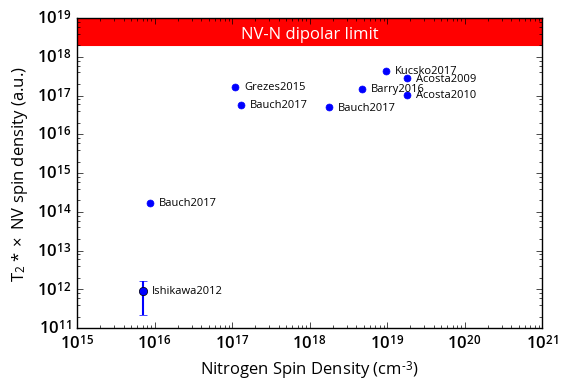

In [1000]:
# pick non-nan values
ind = (~np.isnan(y2)) * (~np.isnan(x3)) 
# select only NV center values - first ten 
ind = ind[:10]

x3n = x3[ind]
y2n = y2[ind]

length = len(x3n)
labelsn = np.array(labels)[ind]

# plot data + labels
plt.plot(x3n, y2n, 'b.', ms=10)
for i in range(length):
    plt.text(x3n[i]*1.3, y2n[i]*(0.99), labelsn[i], fontsize=8, fontweight='normal', va='center', ha='left')

# plot p1-limit
xx = np.linspace(1e9, 1e22, 200);
plt.plot(xx, xx * 1/(2 * np.pi * 0.014 * xx/(1.76*1e17)), 'r-', lw=1.5)

# set single spin resolvability limit

# plt.plot([1e13,1e13], [1e10, 1e19],'k--', lw=1.5)

# plot Ishikawa 
plt.errorbar(7e15, 5.00e10 * 18.5, yerr=14 * 5.00e10, fmt='o', color='b', lw=1.5)
# plt.text(5e10, 1.05, 18.5)
# set plot labels

## dipolar limit

l1 = 1/(2 * np.pi * 0.014/(1.76*1e17))
# plt.plot(xx, l1, 'k--')
plt.fill_between([1e10, 1e23], [l1, l1], [1e20, 1e20], facecolor='r', edgecolor='None', interpolate=False)
plt.text(1e18, 3 * 1e18, 'NV-N dipolar limit', ha='center', color='#ffffff', fontweight='normal')

## plot settings
plt.xlabel('Nitrogen Spin Density ($cm^{-3}$)')
plt.ylabel(r'T$_2* \times $ NV spin density (a.u.)')

plt.xscale('log')
plt.yscale('log')

plt.xlim(1e15, 1e21)
plt.ylim([1e11, 1e19])

plt.savefig("T2star_survey_fig2_fom.pdf")
plt.savefig("T2star_survey_fig2_fom.png")

plt.show()

### Compare T2* and FOM2 versus Interrogated Spin

### T2* versus spin density (all spin species)
#t2starall

In [22]:
# define spin species as given in file
species_label = ['NV-', 'N', 'SiV0', 'P', 'PL5', 'PL6', 'PL?', 'Cr', 'Mn']
# species_label = species_label[:1]

# define legend labels
legend_label = ['NV$^-$:Diamond', 'N:Diamond', 'SiV$^0$:Diamond', 'P:Si', 'PL5:SiC', 'PL6:SiC', 'PL:SiC', 'Cr:SiC', 'Mn:ZnO']

# define markers and color
markers = ['bo', 'k*', 'r^', 'gs', '+m', 'Dc', 'py', 'rp', 'kr^']

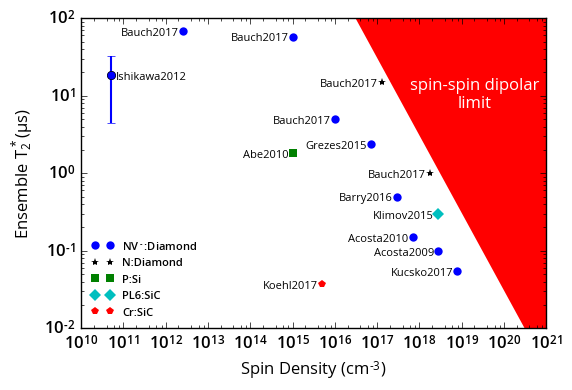

In [1041]:
# interate over all spin types
s=0 # current run
for species in species_label: 
    species_df = df.loc[df['Defect']==species]
    
    # spin density in cm^-3
    x = pd.to_numeric(species_df.iloc[:,2], 'coerce').get_values()
    # T2*
    y = pd.to_numeric(species_df.iloc[:,5], 'coerce').get_values()
    
    # some of the entries are nan, remove these
    ind = (~np.isnan(y)) * (~np.isnan(x)) 
    x = x[ind];y = y[ind];
    
    # only plot if x and y are not empty
    if (len(x)!=0) & (len(y)!=0):
        # reference label
        ref_label = species_df.iloc[ind,10].get_values()

        # plot data and labels
        plt.plot(x, y, markers[s], ms=6, markeredgecolor = 'none', label=legend_label[s])
        if species =='NV-':
            place_labels([x,y],ref_label, ['l','l','l','l','l','r'])
        else:
            place_labels([x,y],ref_label, ['l','l','l','l','l','r'])
            
    s=s+1  
    
# plot Ishikawa
plt.errorbar(5e10, 18.5, yerr=14, fmt='o', color='b', lw=1.5)

## plot shaded regions
# single spin sensitivity
# plt.plot([1e13,1e13], [1e-3,1e3],'k--', lw=1.5)
# plt.fill_between([0, 10**13], [10**-3,10**-3], [10**3,10**3], facecolor='.90', edgecolor='None', interpolate=False)
# plt.text(4*10**11, 5*10**-1, 'individual spins\n resolvable', ha='center', color='0.20', fontweight='normal')

# plot p1-limit
xx = np.linspace(1e15, 1e23, 100);
l1 = 1/(2 * np.pi * 0.0091 * xx/(1.76*1e17))
plt.fill_between(xx, l1, [10**6] * len(l1), where = [10**6] > l1, facecolor='r', edgecolor='None', interpolate=False)
plt.text(2 * 10**19, 0.7 * 10**1, 'spin-spin dipolar\nlimit', ha='center', color='#ffffff', fontweight='normal')

# set plot labels
plt.xlabel('Spin Density ($cm^{-3}$)')
plt.ylabel(r'Ensemble $T_2^* (\mu$s)')

# plot legend
plt.legend(frameon=False, loc=3, fontsize=8)

plt.xscale('log')
plt.yscale('log')

# plt.xlim(10**15, 10**20)
ax = plt.gca()
ax.set_xlim([1e10,1e21])

plt.ylim([10**-2, 100])

plt.savefig("T2star_survey_fig3.pdf")
plt.savefig("T2star_survey_fig3.png")

plt.show()

In [1042]:
#fomall

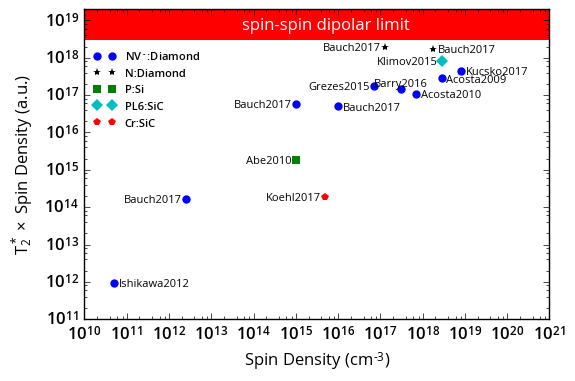

In [1045]:
# interate over all spin types
s=0 # current run
for species in species_label: 
    species_df = df.loc[df['Defect']==species]
    
    # spin density in cm^-3
    x = pd.to_numeric(species_df.iloc[:,2], 'coerce').get_values()
    # T2*
    y = pd.to_numeric(species_df.iloc[:,7], 'coerce').get_values()
    
    # some of the entries are nan, remove these
    ind = (~np.isnan(y)) * (~np.isnan(x)) 
    x = x[ind];y = y[ind];

    # only plot if x and y are not empty
    if (len(x)!=0) & (len(y)!=0):
        # reference label
        ref_label = species_df.iloc[ind,10].get_values()

        # plot data and labels
        plt.plot(x, y, markers[s], ms=6, markeredgecolor = 'none', label=legend_label[s])
        if species =='NV-':
            place_labels([x,y],ref_label, ['l','l','r','t','l','r','r','r','r','r'])
        elif species=='N':
            place_labels([x,y],ref_label, ['l','r','l','r'])
        else:
            place_labels([x,y],ref_label)
            
    s=s+1  
    
# plot Ishikawa
plt.errorbar(5e10, 18.5, yerr=14, fmt='o', color='b', lw=1.5)

# dipolar-limit
# xx = np.linspace(1e8, 1e22, 200);
# plt.plot(xx, 1/(2 * np.pi * 0.0091/(1.76*1e17)), 'r-', lw=1.5)

# ## plot shaded areas
l1 = 1/(2 * np.pi * 0.0091/(1.76*1e17))
# # plt.plot(xx, l1, 'k--')
plt.fill_between([1e10, 1e23], [l1, l1], [1e20, 1e20], facecolor='r', edgecolor='None', interpolate=False)
plt.text(5 * 1e15, 6 * 1e18, 'spin-spin dipolar limit', ha='center', color='#ffffff', fontweight='normal')

## plot settings
# set plot labels
plt.xlabel('Spin Density ($cm^{-3}$)')
plt.ylabel(r'$T_2^* \times$ Spin Density (a.u.)')

# plot legend
plt.legend(frameon=False, loc=[0.01,0.6], fontsize=8)

plt.xscale('log')
plt.yscale('log')

plt.xlim(1e10, 1e21)
plt.ylim([1e11, 2*1e19])

# # plt.xlim(10**15, 10**20)
# ax = plt.gca()
# ax.set_xlim([1e10,1e20])

# # plt.ylim([10**-2, 100])

plt.savefig("T2star_survey_fig3_fom.pdf")
plt.savefig("T2star_survey_fig3_fom.png")

plt.show()

In [1071]:
#t2star2all

In [1089]:
ref_label

array(['Klimov2015'], dtype=object)

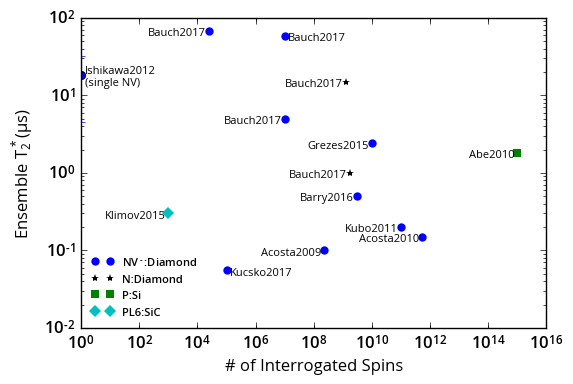

In [1094]:
# interate over all spin types
s=0 # current run
for species in species_label: 
    species_df = df.loc[df['Defect']==species]
    
    # interrogated spins
    x = pd.to_numeric(species_df.iloc[:,4], 'coerce').get_values()
    # T2*
    y = pd.to_numeric(species_df.iloc[:,6], 'coerce').get_values()
    
    # some of the entries are nan, remove these
    ind = (~np.isnan(y)) * (~np.isnan(x)) 
    x = x[ind];y = y[ind];
    
    # only plot if x and y are not empty
    if (len(x)!=0) & (len(y)!=0):
        # reference label
        ref_label = species_df.iloc[ind,11].get_values()

        # plot data and labels
        plt.plot(x, y, markers[s], ms=6, markeredgecolor = 'none', label=legend_label[s])
        if species =='NV-':
            place_labels([x,y],ref_label, ['l','r','l','l','l','r','l','l','l','r','l'])
        else:
            place_labels([x,y],ref_label, ['l','l','l','l','l','r','r'])
            
    s=s+1  
    
# plot Ishikawa
plt.errorbar(1, 18.5, yerr=14, fmt='o', color='b', lw=1.5)

## plot shaded regions
# single spin sensitivity
# plt.plot([1e13,1e13], [1e-3,1e3],'k--', lw=1.5)
# plt.fill_between([0, 10**13], [10**-3,10**-3], [10**3,10**3], facecolor='.90', edgecolor='None', interpolate=False)
# plt.text(4*10**11, 5*10**-1, 'individual spins\n resolvable', ha='center', color='0.20', fontweight='normal')

# plot p1-limit
# xx = np.linspace(1e15, 1e23, 100);
# l1 = 1/(2 * np.pi * 0.0091 * xx/(1.76*1e17))
# plt.fill_between(xx, l1, [10**6] * len(l1), where = [10**6] > l1, facecolor='r', edgecolor='None', interpolate=False)
# plt.text(2 * 10**19, 0.7 * 10**1, 'spin-spin dipolar\nlimit', ha='center', color='#ffffff', fontweight='normal')

# set plot labels
plt.xlabel('# of Interrogated Spins')
plt.ylabel(r'Ensemble $T_2^* (\mu$s)')

# plot legend
plt.legend(frameon=False, loc=3, fontsize=8)

plt.xscale('log')
plt.yscale('log')

plt.xlim(1, 1e16)
# ax = plt.gca()
# ax.set_xlim([1e10,1e21])

plt.ylim([10**-2, 100])

plt.savefig("T2star_survey_fig4.pdf")
plt.savefig("T2star_survey_fig4.png")

plt.show()

In [1084]:
#fom2all

In [1095]:
labels

array(['Bauch2017', 'Bauch2017', 'Bauch2017', 'Barry2016', 'Grezes2015',
       'Ishikawa2012\n(single NV)', 'Kubo2011', 'Acosta2010', 'Acosta2009',
       'Kucsko2017', 'Bauch2017', 'Bauch2017', 'Rose2017', 'Abe2010',
       'Zhou2017', 'Klimov2015', 'Koehl2011', 'Koehl2017', 'Koehl2017',
       'George2013', nan, nan, 'Angerer2016', 'Maurer2012', nan,
       'Christle2014'], dtype=object)

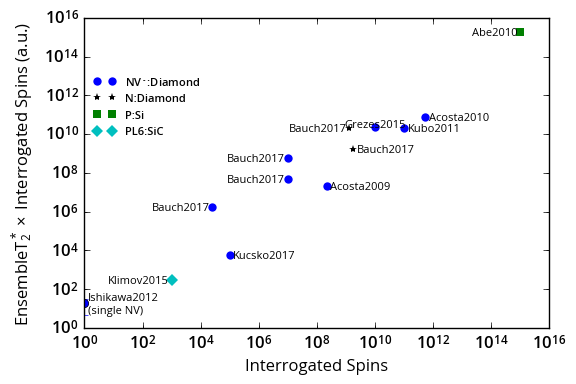

In [1100]:
# interate over all spin types
s=0 # current run
for species in species_label: 
    species_df = df.loc[df['Defect']==species]
    
    # spin density in cm^-3
    x = pd.to_numeric(species_df.iloc[:,4], 'coerce').get_values()
    # T2*
    y = pd.to_numeric(species_df.iloc[:,9], 'coerce').get_values()
    
    # some of the entries are nan, remove these
    ind = (~np.isnan(y)) * (~np.isnan(x)) 
    x = x[ind];y = y[ind];

    # only plot if x and y are not empty
    if (len(x)!=0) & (len(y)!=0):
        # reference label
        ref_label = species_df.iloc[ind,11].get_values()

        # plot data and labels
        plt.plot(x, y, markers[s], ms=6, markeredgecolor = 'none', label=legend_label[s])
        if species =='NV-':
            place_labels([x,y],ref_label, ['l','l','l','t','r','r','r','r','r','r'])
        elif species=='N':
            place_labels([x,y],ref_label, ['l','r','l','r'])
        else:
            place_labels([x,y],ref_label)
            
    s=s+1  
    
# plot Ishikawa
plt.errorbar(1, 18.5, yerr=14, fmt='o', color='b', lw=1.5)

# # dipolar-limit
# # xx = np.linspace(1e8, 1e22, 200);
# # plt.plot(xx, 1/(2 * np.pi * 0.0091/(1.76*1e17)), 'r-', lw=1.5)

# # ## plot shaded areas
# l1 = 1/(2 * np.pi * 0.0091/(1.76*1e17))
# # # plt.plot(xx, l1, 'k--')
# plt.fill_between([1e10, 1e23], [l1, l1], [1e20, 1e20], facecolor='r', edgecolor='None', interpolate=False)
# plt.text(5 * 1e15, 6 * 1e18, 'spin-spin dipolar limit', ha='center', color='#ffffff', fontweight='normal')

## plot settings
# set plot labels
plt.xlabel('Interrogated Spins')
plt.ylabel(r'$Ensemble T_2^* \times$ Interrogated Spins (a.u.)')

# plot legend
plt.legend(frameon=False, loc=[0.01,0.6], fontsize=8)

plt.xscale('log')
plt.yscale('log')

plt.xlim(1, 1e16)
# plt.ylim([1e11, 2*1e19])

# # plt.xlim(10**15, 10**20)
# ax = plt.gca()
# ax.set_xlim([1e10,1e20])

# # plt.ylim([10**-2, 100])

plt.savefig("T2star_survey_fig4_fom.pdf")
plt.savefig("T2star_survey_fig4_fom.png")

plt.show()

# references + spin concentrations where available

In [412]:
um3 = 10**-12 # qubic micron in qubic cm

Abe, E., Tyryshkin, A. M., Tojo, S., Morton, J. J. L., Witzel, W. M., Fujimoto, A., … Itoh, K. M. (2010). Electron spin coherence of phosphorus donors in silicon: Effect of environmental nuclei. Physical Review B - Condensed Matter and Materials Physics, 82(12), 9–12. 

Acosta, V. M., Bauch, E., Jarmola, A., Zipp, L. J., Ledbetter, M. P., & Budker, D. (2010). Broadband magnetometry by infrared-absorption detection of nitrogen-vacancy ensembles in diamond. Applied Physics Letters, 97(17). http://doi.org/10.1063/1.3507884

In [245]:
detectionVol = 50 * 50 * 300 * um3
concentration = 7e17 # cm^-3
'%e' %  (detectionVol * concentration)

'5.250000e+11'

Acosta, V. M., Bauch, E., Ledbetter, M. P., Santori, C., Fu, K. M. C., Barclay, P. E., … Budker, D. (2009). Diamonds with a high density of nitrogen-vacancy centers for magnetometry applications. Physical Review B - Condensed Matter and Materials Physics, 80(11), 1–15. https://doi.org/10.1103/PhysRevB.80.115202

In [246]:
detectionVol = 0.5 * 0.5 * 300 * um3
concentration = 2.8e18 # cm^-3
'%e' %  (detectionVol * concentration)

'2.100000e+08'

Angerer, A., Perroy, R., & Careas, S. (2015). Subnanotesla quantum-interference magnetometry with a single spin in diamond. https://arxiv.org/abs/1509.01637

Christle, D., Falk, A., & Andrich, P. (2014). Isolated electron spins in silicon carbide with millisecond-coherence times. Nature Materials, 14(February), 160–163. https://doi.org/10.1038/NMAT4144

Becker, J. N., Görlitz, J., Arend, C., Markham, M., & Becher, C. (2016). Ultrafast, all-optical coherent control of single silicon vacancy colour centres in diamond, 2, 1–6. http://doi.org/10.1038/ncomms13512

George, R. E., Edwards, J. P., & Ardavan, A. (2013). Coherent spin control by electrical manipulation of the magnetic anisotropy. Physical Review Letters, 110(2), 1–5. https://doi.org/10.1103/PhysRevLett.110.027601

Grezes, C., Julsgaard, B., Kubo, Y., Ma, W. L., Stern, M., Bienfait, A., … Bertet, P. (2015). Storage and retrieval of microwave fields at the single-photon level in a spin ensemble. Physical Review A, 92(2), 20301. https://doi.org/10.1103/PhysRevA.92.020301

Maurer, P. C., Kucsko, G., Latta, C., Jiang, L., Yao, N. Y., Bennett, S. D., … Lukin, M. D. (2012). Room-Temperature Quantum Bit Memory Exceeding One Second. Science, 336(6086), 1283–1286. https://doi.org/10.1126/science.1220513

Kucsko, G., Choi, S., Choi, J., Maurer, P. C., Sumiya, H., Onoda, S., … Lukin, M. D. (2016). Critical thermalization of a disordered dipolar spin system in diamond.

In [855]:
detectionVol = 0.3 * 0.3 * 0.3 *um3
spindensity = 45e17
spins = '%e' %  (detectionVol * spindensity)
spins

'1.215000e+05'

Koehl, W. F., Diler, B., Whiteley, S. J., Bourassa, A., Son, N. T., Janzén, E., & Awschalom, D. D. (2017). Resonant optical spectroscopy and coherent control of Cr4+ spin ensembles in SiC and GaN. Physical Review B, 95(3), 35207. https://doi.org/10.1103/PhysRevB.95.035207

Klimov, P. V, Falk, A. L., Christle, D. J., Dobrovitski, V. V, & Awschalom, D. D. (2015). Quantum entanglement at ambient conditions in a macroscopic solid-state spin ensemble. Sci. Adv., 1(1), 1–8. http://doi.org/10.1126/sciadv.1501015

Koehl, W. F., Buckley, B. B., Heremans, F. J., Calusine, G., & Awschalom, D. D. (2011). Room temperature coherent control of defect spin qubits in silicon carbide. Nature, 479(7371), 84–87. http://doi.org/10.1038/nature10562

Kubo, Y., Grezes, C., Dewes, A., Umeda, T., Isoya, J., Sumiya, H., … Bertet, P. (2011). Hybrid quantum circuit with a superconducting qubit coupled to a spin ensemble. Physical Review Letters, 107(22). http://doi.org/10.1103/PhysRevLett.107.220501

In [247]:
detectionVol = 40 * um3
spins = 10**3
concentraton = '%e' %  (spins * detectionVol)
concentration

2.8e+18

Zhou, Y., Wang, J., Zhang, X., Li, K., Cai, J., & Gao, W. (2017). Self-protected nanoscale thermometry based on spin defects in silicon carbide, (4), 1–7. Retrieved from http://arxiv.org/abs/1704.03301